In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [24]:
raw_data = np.load('./data2d.npz')
X = raw_data['X']
y = raw_data['y'].reshape((70, 1))

In [25]:
X = tf.constant(X)
y = tf.constant(y)

In [26]:
def sigmoid(z):
    return 1 / (1 + tf.math.exp(-z))

In [27]:
def phi(X, W, b):
    return sigmoid((X @ W) + b)

In [28]:
def compute_loss(y_hat, y):
    return tf.reduce_mean(-(y*tf.math.log(y_hat) + (1-y)*tf.math.log(1-y_hat)), axis=0)

In [29]:
W = tf.Variable(np.random.rand(2, 1)*0.1)
b = tf.Variable(0.0, dtype=tf.double)

In [30]:
learning_rate = 1e-2
epochs = 10000

In [31]:
losses = []
for _ in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch([W, b])
        y_hat = phi(X, W, b)
        loss = compute_loss(y_hat, y)
    grad = tape.gradient(loss, {
        "W" : W,
        "b" : b
    })
    W = W - learning_rate * grad['W']
    b = b - learning_rate * grad['b']
    losses.append(loss)

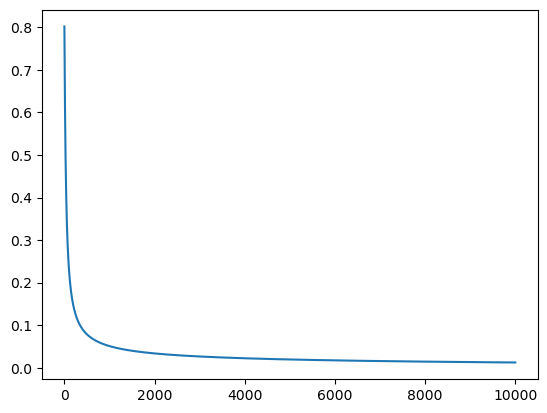

In [32]:
plt.plot(losses)
plt.show()

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.10/site-packages/matplotlib/axes/_base.py:2539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xys = np.asarray(xys)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

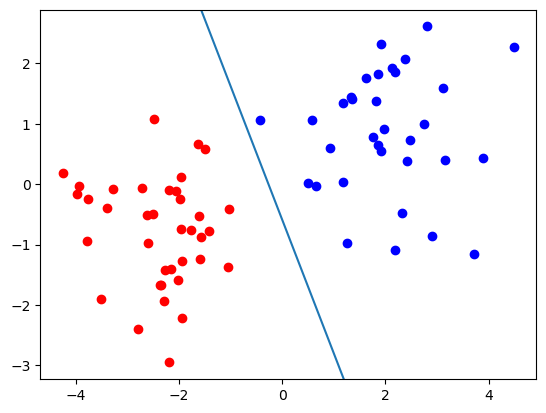

In [33]:
for i in range(len(y)):
    if y[i]:
        plt.scatter(X[i, 0], X[i, 1], c='r')
    else:
        plt.scatter(X[i, 0], X[i, 1], c='b')


plt.axline((0.0, -b/W[1]), (-b/W[0], 0.0))
plt.show()